# Model Design and Development

### Required Modules

In [236]:
import os
import pandas as pd
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Matching Pose Data via Euclidean Distance

In [245]:
def compute_distance(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  distance = np.sqrt(dx**2 + dy**2)
  return round(distance,4)

def compute_distance_matrix(df1xy, df2xy):
    distance_matrix = []
    for i in range(0,len(df1xy)):
        d = compute_distance(df1xy[i][0],df1xy[i][1],df2xy[i][0], df2xy[i][1])
        distance_matrix.append(d)
    return distance_matrix

def compute_pose_euclidean_distance(training_data_dir, user_data_path, avg_thresh):
    
    try:
        if not os.path.exists(training_data_dir) or not os.path.exists(user_data_path):
            return False

        training_data_files = []

        for filename in os.listdir(training_data_dir):
            if filename.endswith(".csv"):
                training_data_files.append(os.path.join(training_data_dir, filename))

        training_data_files.sort()

        solutions = {}
        
        ud = pd.read_csv(user_data_path)
        xu = ud['x'].tolist()
        yu = ud['y'].tolist()
        ud_tuple = [(xu[i], yu[i]) for i in range(len(xu))]
        
        for i, training_data_file in enumerate(training_data_files):
            td = pd.read_csv(training_data_file)
            x = td['x'].tolist()
            y = td['y'].tolist()
            td_tuple = [(x[i], y[i]) for i in range(len(x))]
            result = compute_distance_matrix(td_tuple,ud_tuple)
            distance_avg = round(sum(result) / 33,4)
        
            if distance_avg < avg_thresh:
                solutions[training_data_file] = {"distances": result, "average": distance_avg }
                
            if len(solutions) == 0:
                solutions is None
                
        return solutions

    except Exception as e:
        print(f"An error occurred: {str(e)}")
    return False

In [246]:
def plot_compare_solutions(test_image, solutions):
    if len(solutions) == 0:
        return False
        
    num_solutions = len(solutions) + 1
    fig, axs = plt.subplots(1, num_solutions, figsize=(20, 5))
    axs[0].imshow(cv2.imread(test_image))
    axs[0].set_title("Test Image")
    axs[0].axis(False)
    i = 1
    for k, v in solutions.items():
        img_path = k[:-4] + ".png"
        img = cv2.imread(img_path)
        axs[i].imshow(img)
        axs[i].set_title(f"Solution {i} ({v['average']:.2f})")
        axs[i].axis(False)
        i += 1
    fig.tight_layout()
    plt.show()

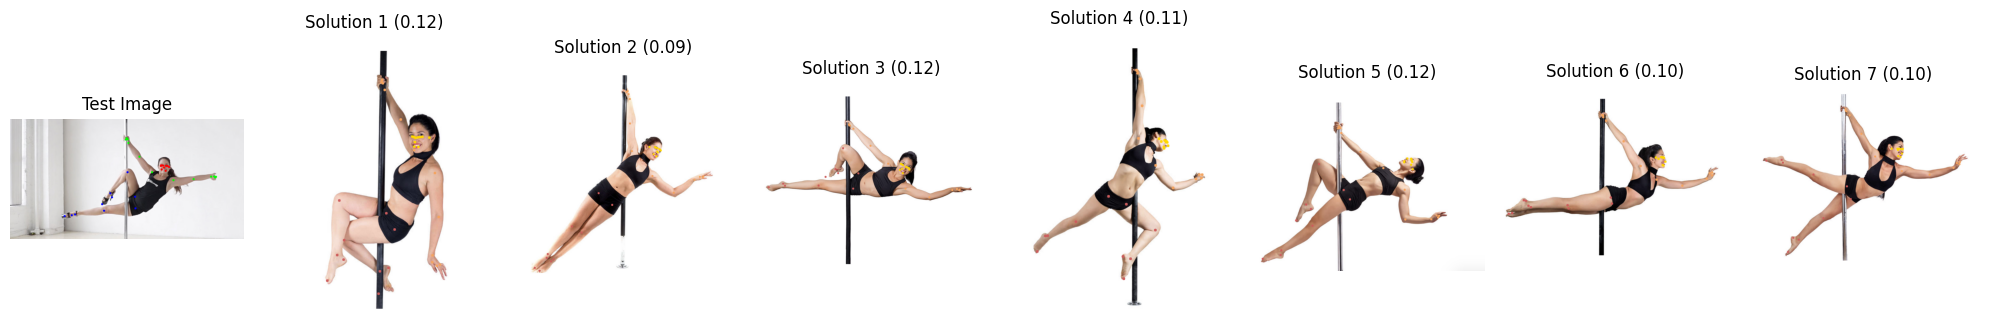

In [256]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00002.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.125)

test_image = 'data/processed/testing/00002.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")

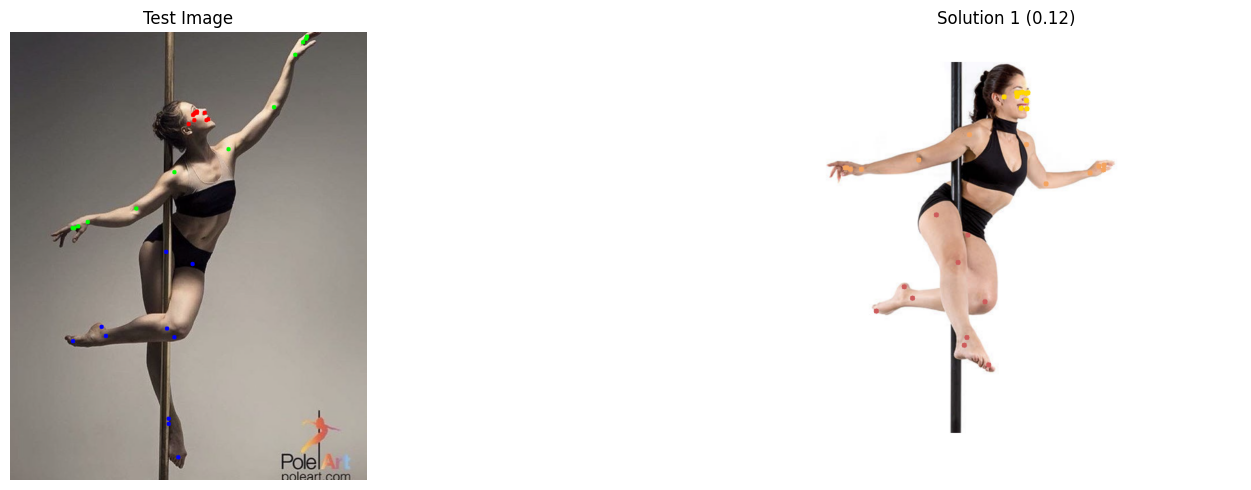

In [257]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00001.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.125)

test_image = 'data/processed/testing/00001.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")

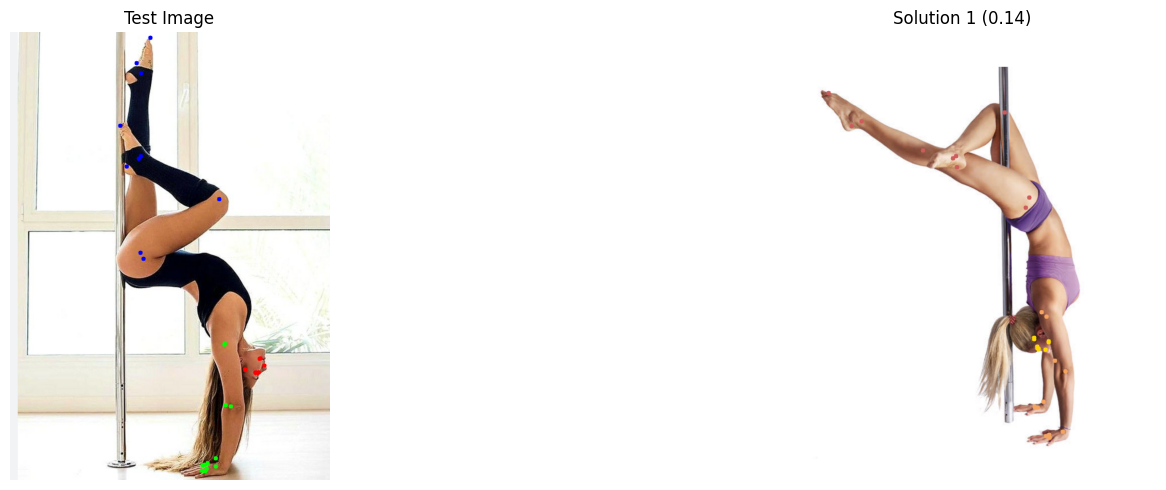

In [263]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00003.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.15)

test_image = 'data/processed/testing/00003.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")

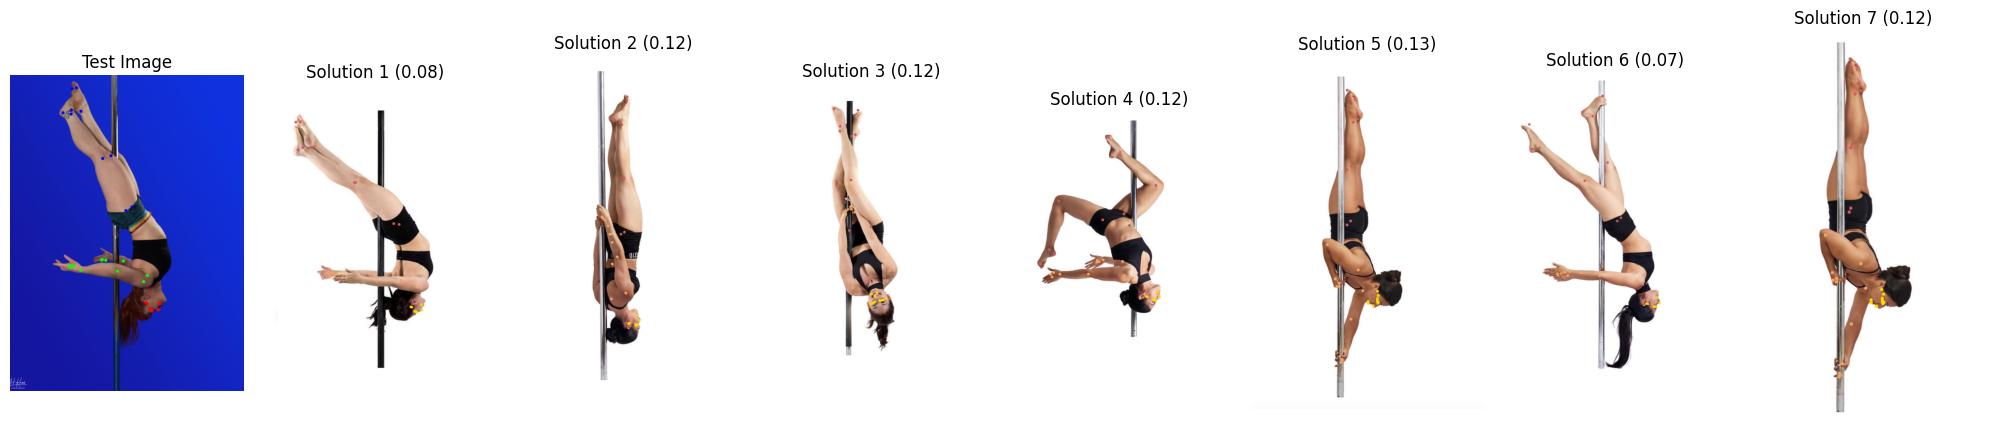

In [264]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00004.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.13)

test_image = 'data/processed/testing/00004.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")

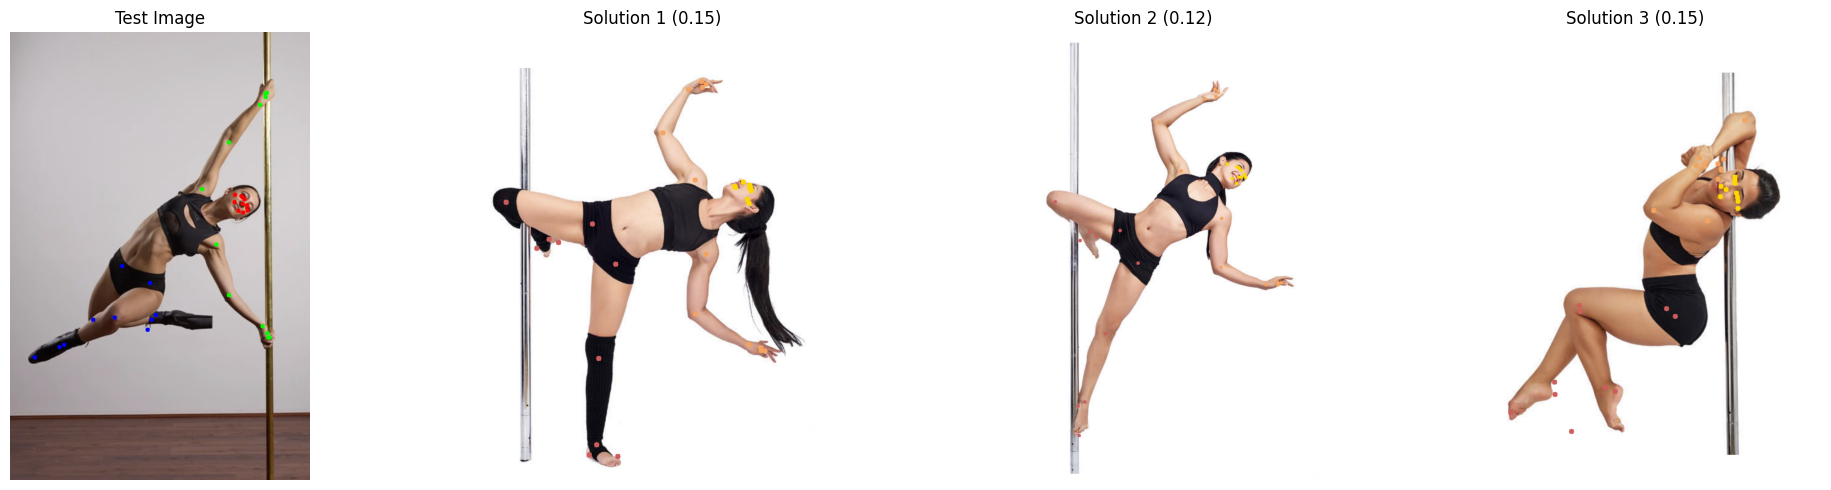

In [266]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00005.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.15)

test_image = 'data/processed/testing/00005.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")